In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install scikit-optimize
from google.colab import drive
drive.mount('/content/drive')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
df=pd.read_csv('drive/My Drive/Colab Notebooks/train.csv')
df.head()
df.describe()

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,3749.500000,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [ ]:
df.describe()
df.isna().sum()
print(df.isna().sum()/len(df))
df.drop(['Months since last delinquent','Id'],axis=1,inplace=True)
count=df["Credit Default"].value_counts()[1]
print(count)
Unique=df['Years in current job'].unique()
print(Unique)
mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
           '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
           '10+ years': 10}

df['Years in current job'] = df['Years in current job'].map(mapping).fillna(np.nan)






# median=df.median()
# df.fillna(median,inplace=True)
print(df.isna().sum()/len(df))

Id                              0.000000
Home Ownership                  0.000000
Annual Income                   0.207600
Years in current job            0.049467
Tax Liens                       0.000000
Number of Open Accounts         0.000000
Years of Credit History         0.000000
Maximum Open Credit             0.000000
Number of Credit Problems       0.000000
Months since last delinquent    0.544133
Bankruptcies                    0.001867
Purpose                         0.000000
Term                            0.000000
Current Loan Amount             0.000000
Current Credit Balance          0.000000
Monthly Debt                    0.000000
Credit Score                    0.207600
Credit Default                  0.000000
dtype: float64
2113
[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
Home Ownership               0.000000
Annual Income                0.207600
Years in current job         0.049467
Tax Liens

In [ ]:
# median_value = df['Current Loan Amount'].median()

# df['Current Loan Amount'] = np.where(df['Current Loan Amount'] == 99999999, median_value, df['Current Loan Amount'])

# df['Current Loan Amount'].describe()

In [ ]:
# Unique_values=df['Home Ownership'].unique()
# for value in Unique_values:
#     print(value)
# Unique_values2=df['Purpose'].unique()
# for value in Unique_values2:
#     print(value)
# Define the mapping of categories to numerical codes
# df=df.drop("Purpose",axis=1)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["Purpose_Encoded"]=label_encoder.fit_transform(df["Purpose"])
df=df.drop("Purpose",axis=1)
# Define the bin ranges and labels
bins = [0, 3, 8, float('inf')]
labels = ['0-3', '4-8', '8+']

# Create dummy variables for the bins
df['Years in current job_bins'] = pd.cut(df['Years in current job'], bins=bins, labels=labels, include_lowest=True)
dummy_columns = pd.get_dummies(df['Years in current job_bins'], prefix='YearsBin')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, dummy_columns], axis=1)

Term_Dummies=pd.get_dummies(df['Term'],drop_first=True,prefix='Term')
df=pd.concat([df,Term_Dummies],axis=1)
Home_dummies=pd.get_dummies(df['Home Ownership'],prefix='Home_status')
df=pd.concat([df,Home_dummies],axis=1)
# Drop the original column and the last dummy column (10+)
df.drop(['Years in current job', 'YearsBin_0-3','Years in current job_bins','Term','Home Ownership','Home_status_Have Mortgage'], axis=1, inplace=True)
# Print the updated DataFrame
df.head()




,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Purpose_Encoded,YearsBin_4-8,YearsBin_8+,Term_Short Term,Home_status_Home Mortgage,Home_status_Own Home,Home_status_Rent
0,482087.0,0.0,11.0,26.3,685960.0,1.0,1.0,99999999.0,47386.0,7914.0,749.0,0,3,0,0,1,0,1,0
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,0.0,264968.0,394972.0,18373.0,737.0,1,3,0,1,0,0,1,0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,0.0,99999999.0,308389.0,13651.0,742.0,0,3,1,0,1,1,0,0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,1.0,121396.0,95855.0,11338.0,694.0,0,3,1,0,1,0,1,0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,0.0,125840.0,93309.0,7180.0,719.0,0,3,1,0,1,0,0,1


Annual Income 935631.25 1505104.0
Tax Liens 0.0 0.0
Number of Open Accounts 8.0 14.0
Years of Credit History 13.5 22.0
Maximum Open Credit 281193.0 794777.5
Number of Credit Problems 0.0 0.0
Bankruptcies 0.0 0.0
Current Loan Amount 180383.5 523831.0
Current Credit Balance 114931.0 357204.75
Monthly Debt 10146.25 24056.75
Credit Score 718.0 740.0
Purpose_Encoded 3.0 3.0
YearsBin_4-8 0.0 1.0
YearsBin_8+ 0.0 1.0
Term_Short Term 0.0 1.0
Home_status_Home Mortgage 0.0 1.0
Home_status_Own Home 0.0 0.0
Home_status_Rent 0.0 1.0
Annual Income 911159.25 1485652.75
Tax Liens 0.0 0.0
Number of Open Accounts 8.0 14.0
Years of Credit History 13.5 21.7
Maximum Open Credit 272734.0 789321.5
Number of Credit Problems 0.0 0.0
Bankruptcies 0.0 0.0
Current Loan Amount 179338.5 512930.0
Current Credit Balance 112009.75 367735.5
Monthly Debt 9987.5 23381.5
Credit Score 718.0 740.0
Purpose_Encoded 3.0 3.0
YearsBin_4-8 0.0 1.0
YearsBin_8+ 0.0 1.0
Term_Short Term 0.0 1.0
Home_status_Home Mortgage 0.0 1.0
Home_s

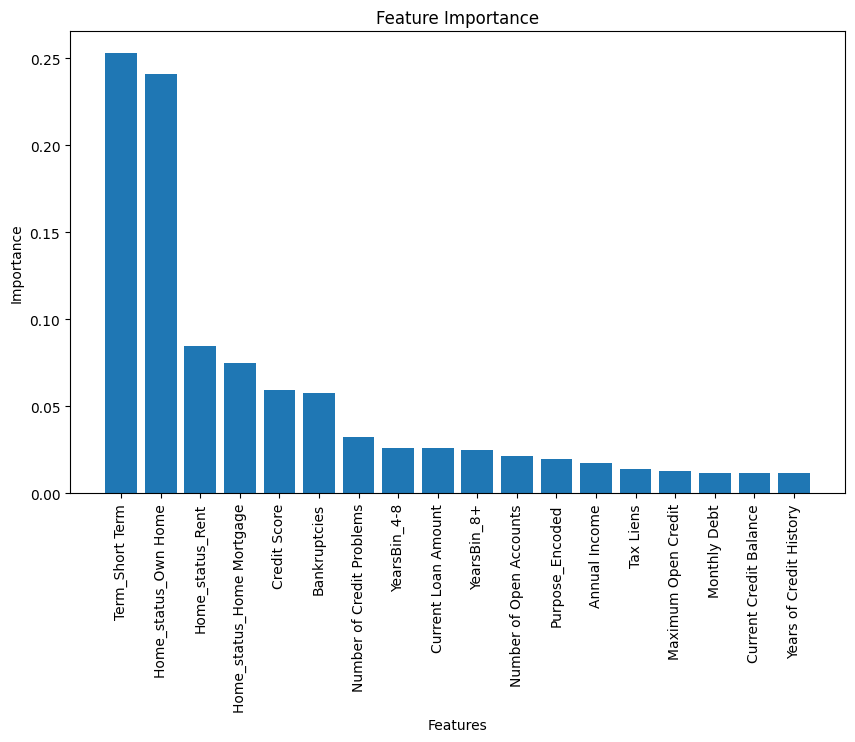

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

X=df.drop('Credit Default',axis=1)
y=df['Credit Default']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
median1=X_train.median()
X_train.fillna(median1,inplace=True)
median2=X_test.median()
X_test.fillna(median2,inplace=True)
outliers=pd.DataFrame()
cols=X_train.columns
# IQR method for outliers
for i in range(len(cols)):
    Q1=X_train.loc[:,cols[i]].quantile(0.25)
    Q3=X_train.loc[:,cols[i]].quantile(0.75)
    print(cols[i],Q1,Q3)
    IQR=Q3-Q1
    outliers[cols[i]] = X_train.loc[((X_train[cols[i]]>Q3+1.5*IQR) | (X_train[cols[i]]<Q1-1.5*IQR) ), cols[i]]



X_train=X_train.drop(outliers.index,axis=0)

y_train=y_train.drop(outliers.index,axis=0)
outliers2=pd.DataFrame()
cols2=X_test.columns
# IQR method for outliers
for i in range(len(cols)):
    Q1=X_test.loc[:,cols[i]].quantile(0.25)
    Q3=X_test.loc[:,cols[i]].quantile(0.75)
    print(cols[i],Q1,Q3)
    IQR=Q3-Q1
    outliers2[cols[i]] = X_test.loc[((df[cols[i]]>Q3+1.5*IQR) | (X_test[cols[i]]<Q1-1.5*IQR) ), cols[i]]


X_test=X_test.drop(outliers2.index,axis=0)

y_test=y_test.drop(outliers2.index,axis=0)
# Assuming X and y are your feature and target variables
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# Obtain predicted probabilities for the positive class
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_pred_prob)
# Evaluating the model (example: accuracy score)
accuracy0 = logreg.score(X_test, y_test)
print("Accuracy:", accuracy0)

# Gradient boosting
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_predXg = xgb_classifier.predict(X_test)
# Predicting probabilities for the positive class
y_pred_probXg = xgb_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_probXg)
# Evaluating accuracy
accuracy1 = accuracy_score(y_test, y_predXg)
print("Accuracy:", accuracy1)

# Evaluating ROC AUC
roc_auc0=roc_auc_score(y_test,y_pred)
roc_auc1 = roc_auc_score(y_test, y_predXg)
print("ROC AUC Logistic:", roc_auc0)
print("ROC AUC XGBOOST:", roc_auc1)
# Get feature importances
importances = xgb_classifier.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
# from skopt import BayesSearchCV
# # Define the parameter search space
# param_space = {
#     'max_depth': (3, 7),
#     'learning_rate': (0.01, 0.1, 'log-uniform'),
#     'n_estimators': (100, 300),
# }

# # Initialize the XGBoost classifier
# xgb_classifier = xgb.XGBClassifier()

# # Perform Bayesian optimization for hyperparameter tuning
# bayes_search = BayesSearchCV(estimator=xgb_classifier, search_spaces=param_space, scoring='roc_auc', cv=3)
# bayes_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = bayes_search.best_params_
# best_score = bayes_search.best_score_
# print("Best Parameters:", best_params)
# print("Best Score (ROC AUC):", best_score)

# # Predicting on the test set with the best model
# best_model = bayes_search.best_estimator_
# y_pred_tuned = best_model.predict(X_test)

# # Evaluating ROC AUC on the test set
# roc_auc_best = roc_auc_score(y_test, y_pred_tuned)
# print("ROC AUC:", roc_auc_best)

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Create LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Define the parameter grid for grid search
# param_grid = {
#     'n_estimators': [100,120,150,180,350,250,80,200, 300],  # Number of trees
#     'learning_rate': [0.1, 0.01, 0.001,0.05,0.08,0.005],  # Learning rate
#     'max_depth': [3, 5, 7]  # Max depth
# }

# Perform grid search
# grid_search = GridSearchCV(lgb_classifier, param_grid)
# grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
lgb_classifier.fit(X_train,y_train)
y_pred =lgb_classifier.predict(X_test)
y_pred_problgb=lgb_classifier.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_pred_problgb)
# Calculate accuracy and ROC AUC
accuracy2 = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy2)
print("ROC AUC:", roc_auc2)

Accuracy: 0.7379012937230475
ROC AUC: 0.6495995847545603


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaler to transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create the neural network model
model = Sequential()
# Configure the optimizer with a specific learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
# Add the first hidden layer with logit activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))
# Add the second hidden layer
model.add(Dense(16, activation='sigmoid'))
# Add the third hidden layer
model.add(Dense(8, activation='sigmoid'))
# Add the output layer with a single neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Train the model on the training data
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)
NeuralNetworkSigmoid=model
# Make predictions on the test set
y_pred_prob = NeuralNetworkSigmoid.predict(X_test_scaled)
y_pred = np.round(y_pred_prob)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob)
# Calculate accuracy
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3)
# Calculate ROC AUC
roc_auc3 = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc3)

Epoch 1/100
218/218 [==============================] - 2s 2ms/step - loss: 0.6830 - auc: 0.6360
Epoch 2/100
218/218 [==============================] - 0s 2ms/step - loss: 0.6035 - auc: 0.8190
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 0.5055 - auc: 0.8513
Epoch 4/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4728 - auc: 0.8611
Epoch 5/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4580 - auc: 0.8642
Epoch 6/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4479 - auc: 0.8664
Epoch 7/100
218/218 [==============================] - 1s 4ms/step - loss: 0.4404 - auc: 0.8676
Epoch 8/100
218/218 [==============================] - 1s 4ms/step - loss: 0.4353 - auc: 0.8679
Epoch 9/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4317 - auc: 0.8679
Epoch 10/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4291 - auc: 0.8677
Epoch 11/100
218/218 [=================

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Create Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
# Obtain the predicted probabilities for the positive class
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob)
# Calculate accuracy and ROC AUC
accuracy4 = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy4)
print("ROC AUC:", roc_auc4)

Accuracy: 0.7460469573550551
ROC AUC: 0.6529839678959495


In [ ]:
from keras.utils import to_categorical

# Convert target variable to categorical format
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Create the neural network model
modelClass = Sequential()

# Configure the optimizer with a specific learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

# Add the first hidden layer with logit activation
modelClass.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))

# Add the second hidden layer
modelClass.add(Dense(16, activation='sigmoid'))

# Add the output layer with 2 units and softmax activation for multi-class classification
modelClass.add(Dense(2, activation='softmax'))

# Compile the model
modelClass.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
modelClass.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=32)
NeuralNetworkSoftmax=modelClass
# Make predictions on the test set
y_pred_prob = NeuralNetworkSoftmax.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
# Calculate accuracy
accuracy5 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy5)

# Calculate ROC AUC
roc_auc5 = roc_auc_score(y_test_categorical[:, 0], y_pred_prob[:,0])
print("ROC AUC:", roc_auc5)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr5, tpr5, thresholds5 = roc_curve(y_test_categorical[:, 0], y_pred_prob[:, 0])


# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=["non-default", "default"])
print("Classification Report:")
print(report)







Epoch 1/100
218/218 [==============================] - 1s 2ms/step - loss: 0.6630 - accuracy: 0.6704
Epoch 2/100
218/218 [==============================] - 1s 3ms/step - loss: 0.5473 - accuracy: 0.7624
Epoch 3/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7693
Epoch 4/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7703
Epoch 5/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7764
Epoch 6/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.7761
Epoch 7/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.7818
Epoch 8/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7783
Epoch 9/100
218/218 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.7756
Epoch 10/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4198 - accura

In [ ]:

from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Create LightGBM classifier
lgb_classifier_bestthreshold = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

lgb_classifier_bestthreshold.fit(X_train,y_train)


# Make predictions on the training set (outputting probabilities)
y_train_pred_prob = lgb_classifier_bestthreshold.predict_proba(X_train)
y_train_pred_prob_positive = y_train_pred_prob[:, 1]

# Compute the FPR and TPR for various threshold values on the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob_positive)

# Find the threshold corresponding to the maximum TPR on the training set
best_threshold_train = thresholds_train[np.argmax(tpr_train)]
# Make predictions on the test set (outputting probabilities)
y_test_pred_prob = lgb_classifier_bestthreshold.predict_proba(X_test)
y_test_pred_prob_positive = y_test_pred_prob[:, 1]

# Calculate the predicted labels based on the best threshold obtained from the training set
y_test_pred = (y_test_pred_prob_positive >= best_threshold_train).astype(int)

# Calculate accuracy and ROC AUC on the test set using the best threshold
accuracy6 = accuracy_score(y_test, y_test_pred)
roc_auc6 = roc_auc_score(y_test, y_test_pred_prob_positive)
# Compute the FPR and TPR for various threshold values on the test set
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_test_pred_prob_positive)

print("Accuracy:", accuracy6)
print("ROC AUC:", roc_auc6)
print("Best Threshold:", best_threshold_train)

Accuracy: 0.49976042165788215
ROC AUC: 0.7483382435294976
Best Threshold: 0.13890281688523112


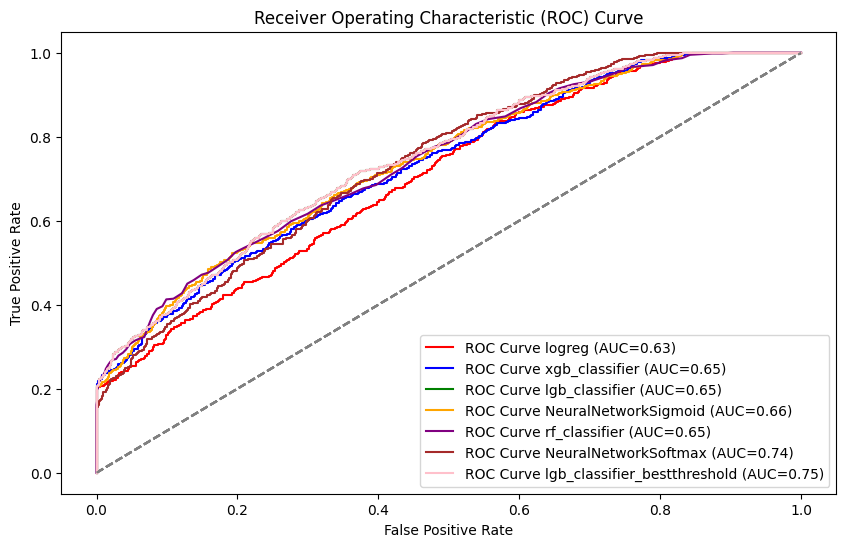

In [ ]:
  # Plot the ROC curve
model_names=['logreg', 'xgb_classifier', 'lgb_classifier', 'NeuralNetworkSigmoid', 'rf_classifier', 'NeuralNetworkSoftmax', 'lgb_classifier_bestthreshold']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

plt.figure(figsize=(10, 6))
for i, model in enumerate(model_names):
    auc_score = eval(f'roc_auc{i}')  # Access the roc_auc variables dynamically
    plt.plot(eval(f'fpr{i}'), eval(f'tpr{i}'), color=colors[i], label=f'ROC Curve {model} (AUC={auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_scores = []
for model in model_names:
    if model == 'NeuralNetworkSigmoid':
        y_pred_prob = globals()[model].predict(X_test_scaled)
        y_pred = np.round(y_pred_prob)
        f1 = f1_score(y_test, y_pred)  # Binary classification F1 score
    elif model == 'NeuralNetworkSoftmax':
        y_pred_prob = globals()[model].predict(X_test_scaled)
        y_pred = np.argmax(y_pred_prob, axis=1)
        y_pred_categorical = to_categorical(y_pred)  # Apply one-hot encoding to y_pred
        f1 = f1_score(y_test_categorical, y_pred_categorical, average='weighted')  # Multiclass F1 score
    else:
        y_pred = globals()[model].predict(X_test)
        f1 = f1_score(y_test, y_pred)  # Binary classification F1 score

    f1_scores.append(f1)

# Print the F1 scores
for model, score in zip(model_names, f1_scores):
    print(f"F1 score for {model}: {score:.2f}")

66/66 [==============================] - 0s 741us/step
F1 score for logreg: 0.50
F1 score for xgb_classifier: 0.49
F1 score for lgb_classifier: 0.49
F1 score for NeuralNetworkSigmoid: 0.51
F1 score for rf_classifier: 0.50
F1 score for NeuralNetworkSoftmax: 0.72
F1 score for lgb_classifier_bestthreshold: 0.49


In [ ]:
from sklearn.metrics import f1_score, matthews_corrcoef

f1_scores = []
mcc_scores = []
for model in model_names:
    if model == 'NeuralNetworkSigmoid':
        y_pred_prob = globals()[model].predict(X_test_scaled)
        y_pred = np.round(y_pred_prob)
        f1 = f1_score(y_test, y_pred)  # Binary classification F1 score
        mcc = matthews_corrcoef(y_test, y_pred)  # Matthews correlation coefficient
    elif model == 'NeuralNetworkSoftmax':
        y_pred_prob = globals()[model].predict(X_test_scaled)
        y_pred = np.argmax(y_pred_prob, axis=1)
        y_pred_categorical = to_categorical(y_pred)  # Apply one-hot encoding to y_pred
        f1 = f1_score(y_test_categorical, y_pred_categorical, average='weighted')  # Multiclass F1 score
        mcc = matthews_corrcoef(np.argmax(y_test_categorical, axis=1), y_pred)  # Matthews correlation coefficient
    else:
        y_pred = globals()[model].predict(X_test)
        f1 = f1_score(y_test, y_pred)  # Binary classification F1 score
        mcc = matthews_corrcoef(y_test, y_pred)  # Matthews correlation coefficient

    f1_scores.append(f1)
    mcc_scores.append(mcc)

# Print the F1 scores and MCC scores
for model, f1, mcc in zip(model_names, f1_scores, mcc_scores):
    print(f"F1 score for {model}: {f1:.2f}")
    print(f"MCC for {model}: {mcc:.2f}")

66/66 [==============================] - 0s 2ms/step
F1 score for logreg: 0.50
MCC for logreg: 0.23
F1 score for xgb_classifier: 0.49
MCC for xgb_classifier: 0.32
F1 score for lgb_classifier: 0.49
MCC for lgb_classifier: 0.33
F1 score for NeuralNetworkSigmoid: 0.51
MCC for NeuralNetworkSigmoid: 0.33
F1 score for rf_classifier: 0.50
MCC for rf_classifier: 0.34
F1 score for NeuralNetworkSoftmax: 0.72
MCC for NeuralNetworkSoftmax: 0.31
F1 score for lgb_classifier_bestthreshold: 0.49
MCC for lgb_classifier_bestthreshold: 0.33
